In [1]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os

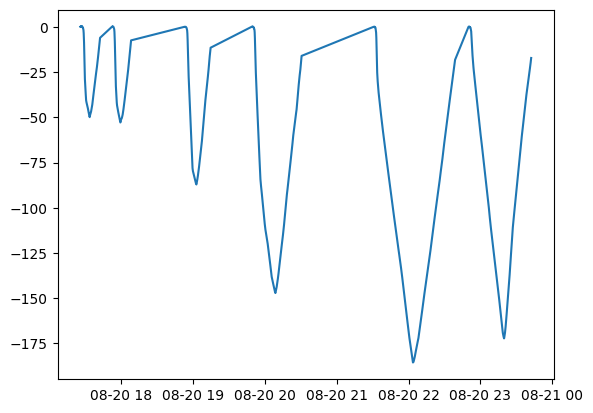

In [2]:
ss_ds = xr.open_dataset('sg000_Shilshole_Test_2024.04.05_timeseries.nc')

depth = ss_ds.depth.values

dive_ids = ss_ds.sg_data_point_dive_number.values

# stores the corrected depth
depth_corrected = depth.copy()

# unique dives in order
unique_dives = sorted(set(dive_ids))

# loop to get and apply offset
for d in unique_dives:
    # indices in sg_data_point belonging to this dive
    idx = (dive_ids == d)

    # first depth measurement in this dive
    offset = depth[idx][0]

    # apply correction
    depth_corrected[idx] = depth[idx] - offset

ss_ds["depth_corrected"] = (("sg_data_point",), depth_corrected)

depth_sg = ss_ds['depth_corrected']
time_sg = ss_ds['time']

# plot to make sure 
plt.plot(time_sg, -depth_sg)

In [3]:
print(os.getcwd())
#Load the dataset


#Align time with sg_data_point and apply offset (if needed)
adjusted_time = pd.to_datetime(ss_ds['time'].values) + pd.DateOffset(years=0, months=0, days=0)

ss_ds['PAR_470nm'] = ss_ds['eng_wlbb2fl_sig470nm']
ss_ds['particle_concentration_700nm'] = ss_ds['eng_wlbb2fl_sig700nm']
ss_ds['chlorophyll_695nm'] = ss_ds['eng_wlbb2fl_sig695nm']

# add metadata
ss_ds['PAR_470nm'].attrs['pre_cleaning_name'] = 'eng_wlbb2fl_sig470nm'
ss_ds['particle_concentration_700nm'].attrs['pre_cleaning_name'] = 'eng_wlbb2fl_sig700nm'
ss_ds['chlorophyll_695nm'].attrs['pre_cleaning_name'] = 'eng_wlbb2fl_sig695nm'

ss_ds = ss_ds.assign_coords(time=('sg_data_point', adjusted_time))

#Select the relevant variables
new_ss_ds = ss_ds[['time', 'depth_corrected', 'latitude', 'longitude','temperature', 'salinity', 'dissolved_oxygen_sat', 'PAR_470nm', 'particle_concentration_700nm', 'chlorophyll_695nm']]

#Convert to DataFrame and save
new_ss_ds.to_dataframe().reset_index().to_csv('sg194_April_2024_Shilshole_Test_timeseries_cleaned.csv', index=False)
new_ss_ds.to_netcdf('sg194_April_2024_Shilshole_Test_timeseries_cleaned.nc')
display(ss_ds)

C:\Users\lydia\Seagliders


<xarray.Dataset> Size: 300kB
Dimensions:                                   (gps_info: 18,
                                               sg_data_point: 1512,
                                               trajectory: 6, dive: 6)
Coordinates:
    time                                      (sg_data_point) datetime64[ns] 12kB ...
    ctd_time                                  (sg_data_point) datetime64[ns] 12kB ...
    ctd_depth                                 (sg_data_point) float32 6kB -6....
    latitude                                  (sg_data_point) float32 6kB 47....
    longitude                                 (sg_data_point) float32 6kB -12...
  * trajectory                                (trajectory) int32 24B 1 2 3 4 5 6
Dimensions without coordinates: gps_info, sg_data_point, dive
Data variables: (12/69)
    gps_info_dive_number                      (gps_info) int32 72B ...
    sg_data_point_dive_number                 (sg_data_point) int32 6kB 1 ... 6
    log_gps_time                              (gps_info) datetime64[ns] 144B ...
    pressure                                  (sg_data_point) float32 6kB ...
    depth                                     (sg_data_point) float32 6kB -5....
    speed_gsm                                 (sg_data_point) float32 6kB ...
    ...                                        ...
    latlong_qc                                (dive) |S1 6B ...
    glider                                    |S12 12B ...
    depth_corrected                           (sg_data_point) float32 6kB 0.0...
    PAR_470nm                                 (sg_data_point) float32 6kB nan...
    particle_concentration_700nm              (sg_data_point) float32 6kB nan...
    chlorophyll_695nm                         (sg_data_point) float32 6kB nan...
Attributes: (12/48)
    project:                         Shilshole Test 2024.04.05
    title:                           Physical, chemical, and biological data ...
    summary:                         SG000 Shilshole Test 2024.04.05
    source:                          Seaglider SG000
    references:                      http://data.nodc.noaa.gov/accession/0092291
    processing_level:                1.12
    ...                              ...
    date_modified:                   2024-04-05T23:04:49Z
    uuid:                            e36f7920-f3a7-11ee-8bfb-cb77ccca147b
    base_station_version:            3.0.2
    base_station_micro_version:      0
    quality_control_version:         1.12
    Conventions:                     CF-1.6

In [4]:
ss_ds = xr.open_dataset('sg000_Shilshole_Test_2024.04.05_timeseries.nc')

#Apply time apply offset (if needed)
adjusted_time = pd.to_datetime(ss_ds['time'].values) + pd.DateOffset(years=0, months=0, days=0)

ss_ds['U_DAC'] = ss_ds['depth_avg_curr_east']
ss_ds['V_DAC'] = ss_ds['depth_avg_curr_north']

# add metadata
ss_ds['U_DAC'].attrs['pre_cleaning_name'] = 'depth_avg_curr_east'
ss_ds['V_DAC'].attrs['pre_cleaning_name'] = 'depth_avg_curr_north'

#Select the relevant variables
new_ss_ds = ss_ds[['U_DAC', 'V_DAC', 'start_time', 'end_time', 'start_latitude', 'end_latitude', 'start_longitude', 'end_longitude']]
display(new_ss_ds)

#Convert to DataFrame and save
new_ss_ds.to_dataframe().reset_index().to_csv('sg194_April_2024_Shilshole_Test_timeseries_DAC_cleaned.csv', index=False)
new_ss_ds.to_netcdf('sg194_April_2024_Shilshole_Test_DAC_timeseries_cleaned.nc')


<xarray.Dataset> Size: 240B
Dimensions:          (dive: 6)
Dimensions without coordinates: dive
Data variables:
    U_DAC            (dive) float32 24B ...
    V_DAC            (dive) float32 24B ...
    start_time       (dive) datetime64[ns] 48B ...
    end_time         (dive) datetime64[ns] 48B ...
    start_latitude   (dive) float32 24B ...
    end_latitude     (dive) float32 24B ...
    start_longitude  (dive) float32 24B ...
    end_longitude    (dive) float32 24B ...
Attributes: (12/48)
    project:                         Shilshole Test 2024.04.05
    title:                           Physical, chemical, and biological data ...
    summary:                         SG000 Shilshole Test 2024.04.05
    source:                          Seaglider SG000
    references:                      http://data.nodc.noaa.gov/accession/0092291
    processing_level:                1.12
    ...                              ...
    date_modified:                   2024-04-05T23:04:49Z
    uuid:                            e36f7920-f3a7-11ee-8bfb-cb77ccca147b
    base_station_version:            3.0.2
    base_station_micro_version:      0
    quality_control_version:         1.12
    Conventions:                     CF-1.6